# Reconhecimento Facial com Face Recognition

## Chamada de bibliotecas

In [ ]:
# Esta biblioteca tem suporte completo apenas com ambientes UNIX/Linux
!pip3 install face_recognition

In [47]:
import dlib
import PIL.Image
import PIL.ImageDraw
import face_recognition
from IPython.display import Image
import matplotlib.pyplot as plt
import os
from pathlib import Path

## Realizando as Primeiras Dectecções de Faces

### Detectando Faces sem Ruído

Podemos entender ruídos na detecção qualquer objeto que possa estar cobrindo, de alguma forma, as faces. Portanto, primeiramente, vamos usar uma imagem que tende a ser a mais limpa possível nesse sentido.

Eu encontrei 6 face(s) nesta fotografia.
Uma face está localizada na localização de pixel Top: 163, Left: 497, Bottom: 271, Right: 605
Uma face está localizada na localização de pixel Top: 186, Left: 275, Bottom: 275, Right: 364
Uma face está localizada na localização de pixel Top: 211, Left: 67, Bottom: 319, Right: 175
Uma face está localizada na localização de pixel Top: 295, Left: 653, Bottom: 402, Right: 760
Uma face está localizada na localização de pixel Top: 271, Left: 366, Bottom: 378, Right: 474
Uma face está localizada na localização de pixel Top: 152, Left: 724, Bottom: 259, Right: 832


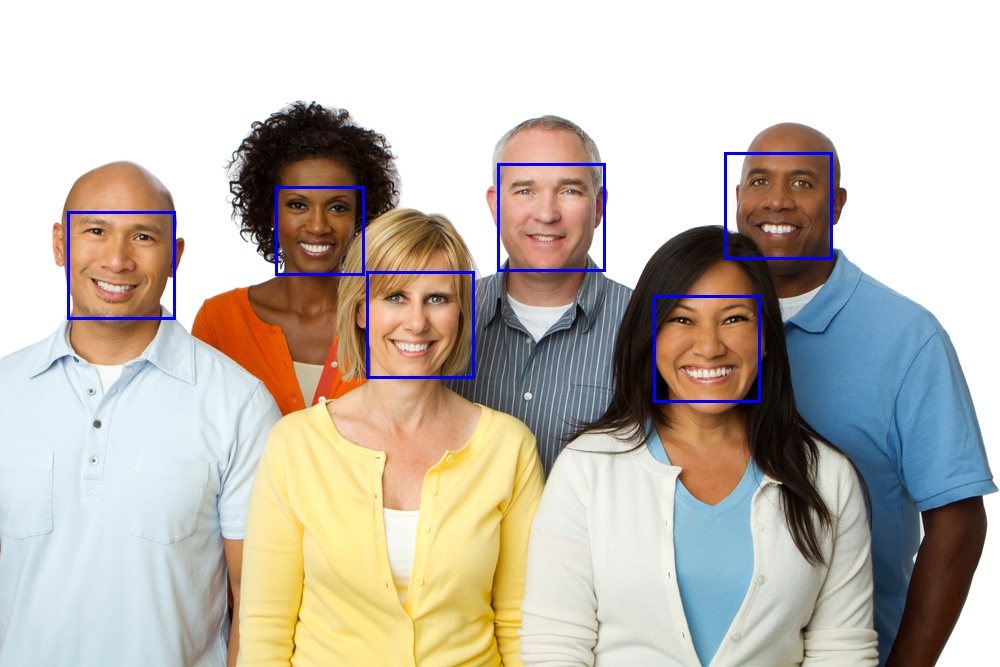

In [16]:
# Carregand oo arquivo JPG em um array numpy
image = face_recognition.load_image_file("./ex_images/people.jpg")
# Encontranodo todas as faces na imagem
face_locations = face_recognition.face_locations(image, model='hog')

number_of_faces = len(face_locations)

print("Eu encontrei {} face(s) nesta fotografia.".format(number_of_faces))


# Carregando a biblioteca de imagem do Python
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    print("Uma face está localizada na localização de pixel Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    
    # Desenhando um retangulo em volta das faces encontradas
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="blue", width=3)
    
    
# Exibindo a imagem
pil_image


Acima, usamos o modelo "hog", ou histogram of oriented gradients, que é mais eficiente em termos de rodagem na CPU, porém é menos acurado que o modelo "cnn", ou convolutional neural network. Para um caso em que a imagem estaria mais dentro de uma fotografia cotidiana, ou seja, com muito ruído, o modelo "hog" pode não ser o mais interessante de ser utilizado.

### Detectando Faces com Ruído

Eu encontrei 4 face(s) nesta fotografia.
Uma face está localizada na localização de pixel Top: 57, Left: 169, Bottom: 97, Right: 208
Uma face está localizada na localização de pixel Top: 53, Left: 491, Bottom: 100, Right: 538
Uma face está localizada na localização de pixel Top: 67, Left: 337, Bottom: 114, Right: 384
Uma face está localizada na localização de pixel Top: 91, Left: 697, Bottom: 138, Right: 744
CPU times: user 2.92 s, sys: 1.08 s, total: 3.99 s
Wall time: 3.33 s


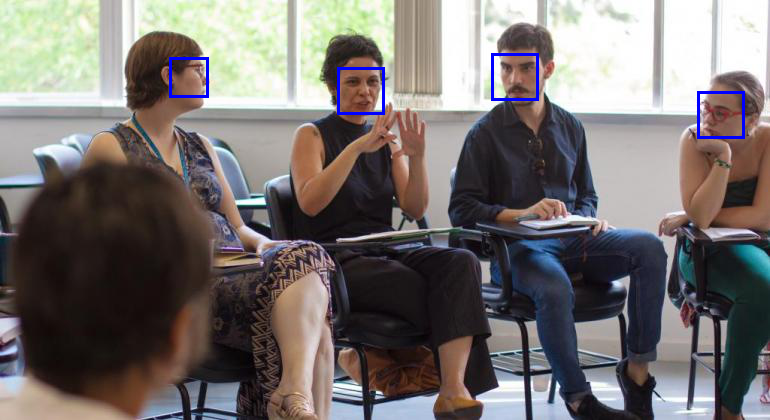

In [22]:
%%time
# Carregand oo arquivo JPG em um array numpy
image = face_recognition.load_image_file("./ex_images/pessoas_reunidas.jpeg")
# Encontranodo todas as faces na imagem
face_locations = face_recognition.face_locations(image, model='cnn')

number_of_faces = len(face_locations)

print("Eu encontrei {} face(s) nesta fotografia.".format(number_of_faces))


# Carregando a biblioteca de imagem do Python
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    print("Uma face está localizada na localização de pixel Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    
    # Desenhando um retangulo em volta das faces encontradas
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="blue", width=3)
    
    
# Exibindo a imagem
pil_image

Observando que utilizando um modelo mais robusto, podemos detecar com sucesso as 4 faces na foto. De modo a fazer contraposição, podemos rodar o reconhecimento da mesma foto, porém com o modelo "hog".

Eu encontrei 2 face(s) nesta fotografia.
Uma face está localizada na localização de pixel Top: 61, Left: 337, Bottom: 113, Right: 389
Uma face está localizada na localização de pixel Top: 49, Left: 492, Bottom: 101, Right: 544
CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 193 ms


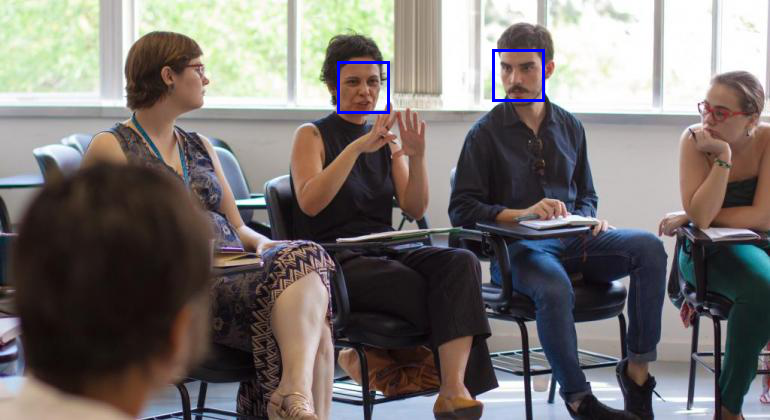

In [23]:
%%time
# Carregand oo arquivo JPG em um array numpy
image = face_recognition.load_image_file("./ex_images/pessoas_reunidas.jpeg")
# Encontranodo todas as faces na imagem
face_locations = face_recognition.face_locations(image, model='hog')

number_of_faces = len(face_locations)

print("Eu encontrei {} face(s) nesta fotografia.".format(number_of_faces))


# Carregando a biblioteca de imagem do Python
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    print("Uma face está localizada na localização de pixel Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    
    # Desenhando um retangulo em volta das faces encontradas
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="blue", width=3)
    
    
# Exibindo a imagem
pil_image

Podemos notar, portanto, o que foi dito anteriormente. O modelo "hog" é muito mais eficiente computacionalmente que o modelo "cnn", porém ele possui dificuldades de reconhecer faces com algum tipo de ruído, ou que estão mal posicionadas.

## Detecção de Características Faciais

Podemos também utilizar a biblioteca face_recognition para detectarmos características faciais presentes em uma imagem de maneira isolada.

I found 6 face(s) in this photograph.


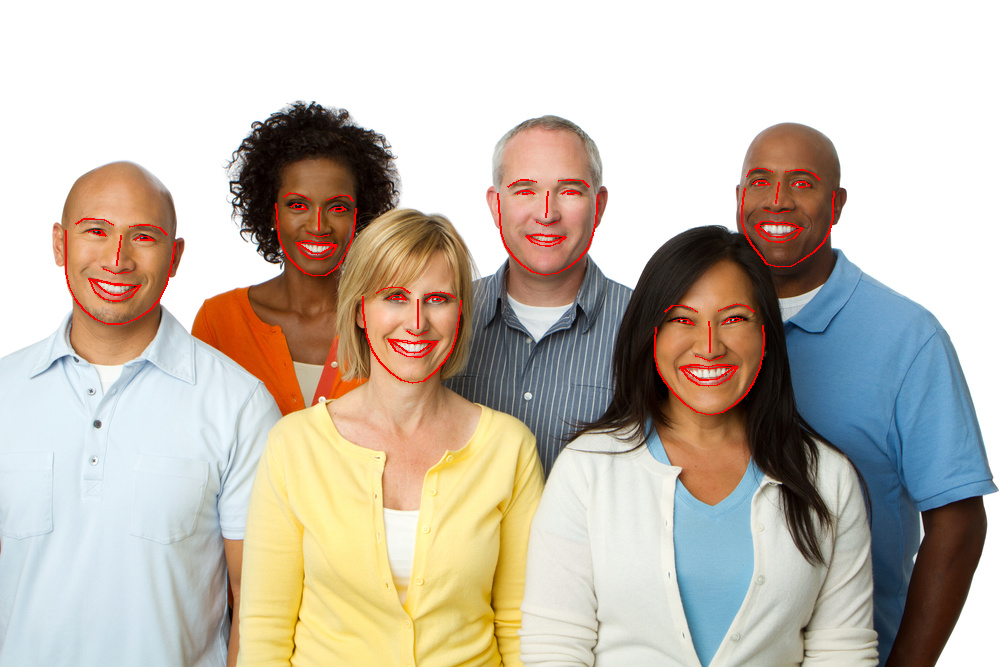

In [28]:
# Carregando o arquivo JPG em uma array numpy
image = face_recognition.load_image_file("./ex_images/people.jpg")

# Encontrando todas as características faciais de uma imagem
face_landmarks_list = face_recognition.face_landmarks(image)


number_of_faces = len(face_landmarks_list)

print("I found {} face(s) in this photograph.".format(number_of_faces))

# Carregando a imagem em um objeto PIL
pil_image = PIL.Image.fromarray(image)

# Criando um objeto PIL que nos possibilite desenhar linhas posteriormente
draw = PIL.ImageDraw.Draw(pil_image)

# Loop que detectará as características de cada face
for face_landmarks in face_landmarks_list:

    # Loop sobre cada característica (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():
        # Printando a localização de cada característica facial na imagem
        # print("The {} in this face has t he following points: {}".format(name, list_of_points))
        
        # Fazendo um traço em cada característica facial presente na foto
        draw.line(list_of_points, fill="red", width=2)
        
pil_image

Podemos verificar que na nossa clássica imagem sem ruído, conseguimos reconhecer facilmente cada característica facial presente na foto. Podemos testar agora com a outra imagem com ruído.

I found 2 face(s) in this photograph.


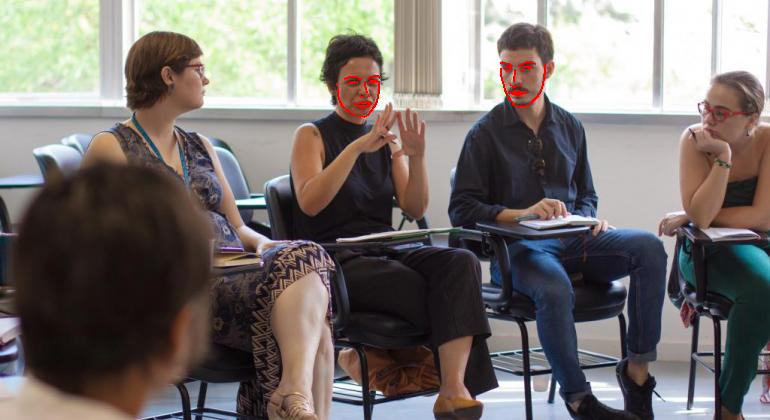

In [33]:
# Carregando o arquivo JPG em uma array numpy
image = face_recognition.load_image_file("./ex_images/pessoas_reunidas.jpeg")

# Encontrando todas as características faciais de uma imagem
face_landmarks_list = face_recognition.face_landmarks(image)


number_of_faces = len(face_landmarks_list)

print("I found {} face(s) in this photograph.".format(number_of_faces))

# Carregando a imagem em um objeto PIL
pil_image = PIL.Image.fromarray(image)

# Criando um objeto PIL que nos possibilite desenhar linhas posteriormente
draw = PIL.ImageDraw.Draw(pil_image)

# Loop que detectará as características de cada face
for face_landmarks in face_landmarks_list:

    # Loop sobre cada característica (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():
        # Printando a localização de cada característica facial na imagem
        # print("The {} in this face has t he following points: {}".format(name, list_of_points))
        
        # Fazendo um traço em cada característica facial presente na foto
        draw.line(list_of_points, fill="red", width=2)
        
pil_image

Podemos ver que foi possível encontrar apenas as características realmente notáveis na foto. Outro teste que pode ser interessante, é realizando o reconhecimento das características com rostos cobertos com máscara.

I found 6 face(s) in this photograph.


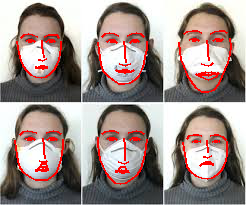

In [36]:
# Carregando o arquivo JPG em uma array numpy
image = face_recognition.load_image_file("./ex_images/rosto_mascara.jpeg")

# Encontrando todas as características faciais de uma imagem
face_landmarks_list = face_recognition.face_landmarks(image)


number_of_faces = len(face_landmarks_list)

print("I found {} face(s) in this photograph.".format(number_of_faces))

# Carregando a imagem em um objeto PIL
pil_image = PIL.Image.fromarray(image)

# Criando um objeto PIL que nos possibilite desenhar linhas posteriormente
draw = PIL.ImageDraw.Draw(pil_image)

# Loop que detectará as características de cada face
for face_landmarks in face_landmarks_list:

    # Loop sobre cada característica (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():
        # Printando a localização de cada característica facial na imagem
        # print("The {} in this face has t he following points: {}".format(name, list_of_points))
        
        # Fazendo um traço em cada característica facial presente na foto
        draw.line(list_of_points, fill="red", width=2)
        
pil_image

Como podemos ver, o modelo reconhece a região dos olhos e sobrancelhas com perfeição, e tenta traçar como seria as demais características cobertas.

### Comparando Faces com Face Recognition

Até então, vemos que a biblioteca face_recognition possui um bom desempenho no papel de reconhecimento facial, mesmo em rosto parcialmente cobertos, ou até posicionados de maneira não-frontal. Porém, também podemos explorar outras abordagens possíveis de serem realizadas pela biblioteca, como por exemplo, comparar rostos em diferentes imagens.

#### Parametrizando Faces

Outra maneira interessante de se trabalhar com o reconhecimento facial, é utilizando métodos que parametrizem as características de um rosto. Isso é uma ferramenta muito útil quando se possui a intenção de comparar imagens e rostos, podendo ser uma estratégia muito eficiente de ser adotada, dependendo do conjunto de imagens que se pretende trabalhar.

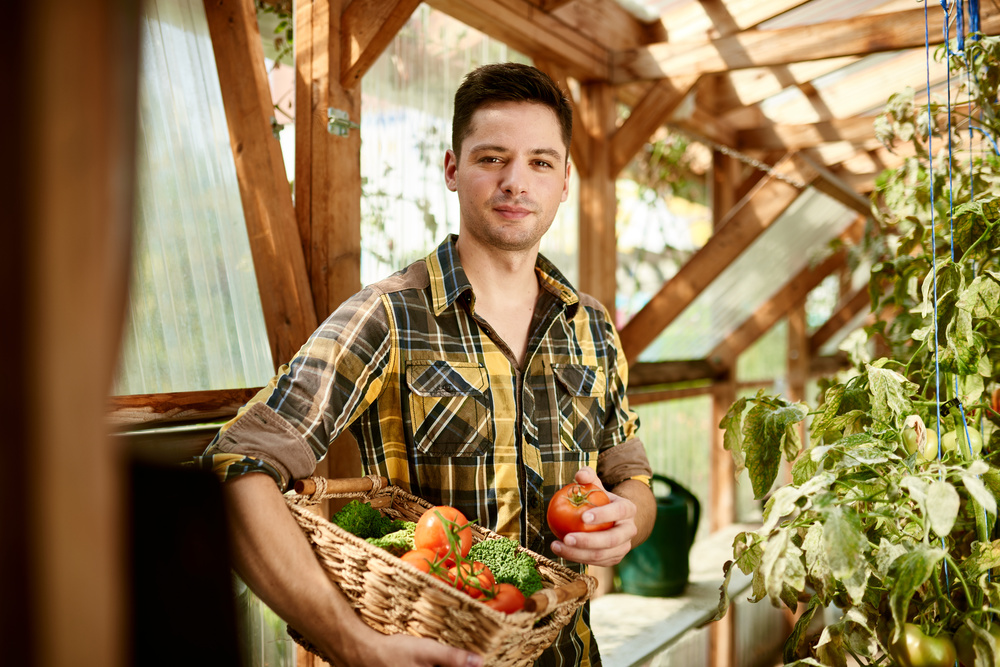

In [41]:
# Carregando o arquivo JPG em um array numpy
image = face_recognition.load_image_file("./ex_images/person.jpg")

# Mostrando a imagem a ser parametrizada
pil_image = PIL.Image.fromarray(image)
pil_image

In [39]:
# Gerando a parametrização da face
face_encodings = face_recognition.face_encodings(image)

if len (face_encodings) == 0:
    # No faces found in the image.
    print("No faces were found.")
    
else:
    # Obtendo a primeira parametrização
    first_face_encoding = face_encodings[0]
    
    # Exibindo os resultados
    print(first_face_encoding)

[-0.20855847  0.01845218  0.05200076 -0.01912917 -0.02748844 -0.01855113
 -0.02725517 -0.01845019  0.19835585 -0.01124571  0.19645655  0.01600681
 -0.15621799 -0.08862403 -0.00915153  0.11604425 -0.12597212 -0.14229295
 -0.03572805 -0.03505836  0.03726102  0.03980881 -0.07782649  0.07926023
 -0.14744228 -0.34706151 -0.10856131 -0.12216783  0.01723715 -0.11650681
  0.06511289 -0.03900217 -0.18297052 -0.10930694  0.06847557  0.12637651
 -0.05037963 -0.09572252  0.1342985  -0.00703446 -0.16005875 -0.0557308
  0.08435307  0.27441853  0.13435341  0.08523721  0.00496137 -0.11246418
  0.16313246 -0.27373871  0.08402466  0.10128959  0.1534483   0.10832092
  0.11609219 -0.09201847  0.07474773  0.25488403 -0.30816701  0.10207562
  0.00198594 -0.01495527  0.03411689 -0.02620054  0.21705684  0.14441349
 -0.11093329 -0.12751675  0.17208114 -0.16183107 -0.04968157  0.1283944
 -0.032075   -0.26411176 -0.31615114  0.07128876  0.36263999  0.18028152
 -0.13117114 -0.01013257 -0.05811106 -0.0073781   0.0

In [40]:
len(first_face_encoding)

128

Podemos observar que o método realiza um encode do rosto parametrizando-o em 128 valores diferentes. Essa estratégia, como dito anteriormente, é bastante útil quando buscamos comparar os rostos de duas imagens diferentes. Pois, se for o rosto da mesma pessoa numa segunda imagem, teríamos que esta imagem  teria uma lista com parâmetros próximos aos da primeira imagem, o que poderia nos levar à conclusão de que se trata da mesma pessoa nas duas imagens. Caso contrário, os valores tenderiam a ser muito diferentes.

#### Comparando Faces

Com a parametrização discutida, podemos utilizar esta técnica para construir uma aplicação da estratégia para comparação de rostos em diferentes imagens. Aqui, utilizaremos um rosto "conhecido" que servirá para buscá-lo em outras imagens.

In [ ]:
# Load the known images
image_of_person_1 = face_recognition.load_image_file("./ex_files/Ch06/person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("./ex_files/Ch06/person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("./ex_files/Ch06/person_3.jpg")

# Get the face encoding of each person
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]


# Create a list of all known face encodings
known_face_encodings = [person_1_face_encoding,
                        person_2_face_encoding,
                       person_3_face_encoding
                       ]


# Load the image we want to check
unknown_image = face_recognition.load_image_file("./ex_files/Ch06/unknown_8.jpg")

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

# There might be more than one person in the photo, 
# so we need to loop over each face encodings

for unknown_face_encoding in unknown_face_encodings:
    
    results = face_recognition.compare_faces(
        known_face_encodings,
        unknown_face_encoding
    )
    
    name = "Unknown"
    
    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"
    
    print(f"Found {name} in the photo!")

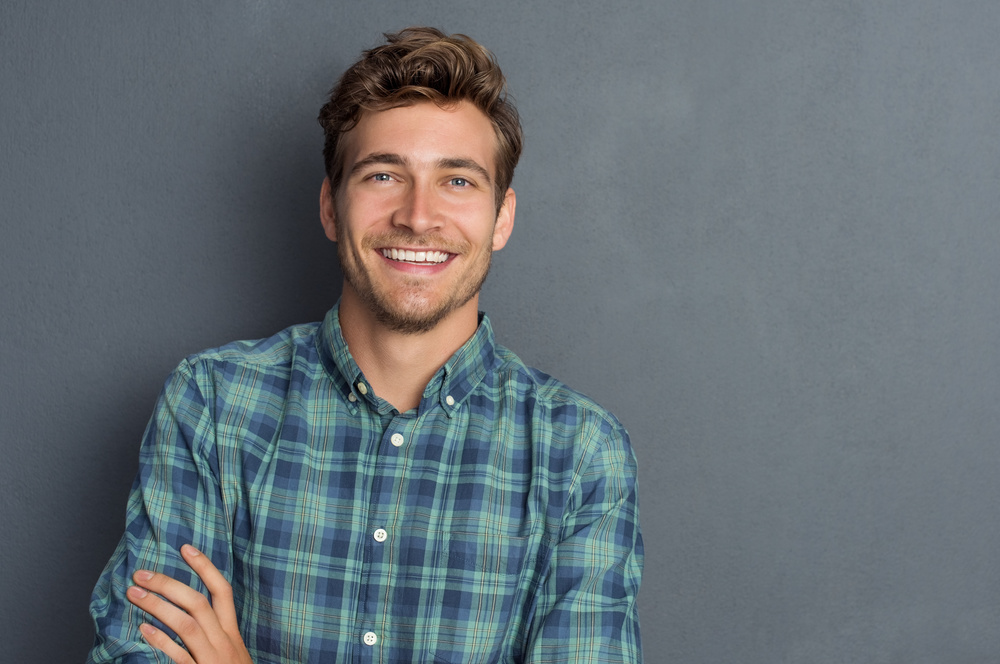

In [42]:
# Carregando a imagem do rosto que queremos que o algoritmo reconheça
known_image = face_recognition.load_image_file("./ex_images/test_face.jpg")

# Mostrando o rosto conhecido
pil_image = PIL.Image.fromarray(known_image)
pil_image

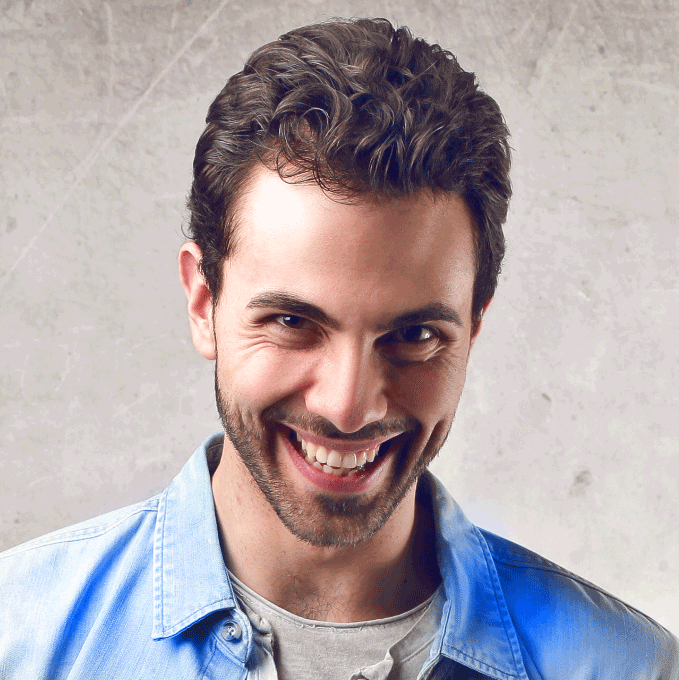

In [49]:
# Parametrizando o rosto conhecido
known_image_encoding = face_recognition.face_encodings(known_image)[0]

# Variáveis que irão rastrear os rostos mais parecidos encontrados com o já conhecido
best_face_distance = 1.0
best_face_image = None

# Loop sobre todas as imagens
for image_path in Path("./ex_images/people").glob("*.png"):
    # Carregando uma imagem para o reconhecimento
    unknown_image = face_recognition.load_image_file(image_path)
    
    # Obtendo a localização de rostos e das suas parametrizações na imagem atual
    face_encodings = face_recognition.face_encodings(unknown_image)
    
    # Obtendo a distância dos parâmetros entre a face conhecida e as demais faces
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]
    
    # Se a face é a mais similar da foto, então salvamos
    if face_distance < best_face_distance:
        # Salvamos a distância da face mais semelhante
        best_face_distance = face_distance
        
        # Copiamos a imagem em si, para que possamos exibí-la
        best_face_image = unknown_image
        
        
        
# Mostramos as face que melhor parece com a conhecida
pil_image = PIL.Image.fromarray(best_face_image)
pil_image

Temos como resultado, portanto, que a foto acima é que mais se assemelha com a do nosso rosto conhecido.